Emotion Frequency: Counter({'average,': 2, 'annoyed,': 2, 'exhaushted,': 2, 'serious,': 1, 'shocked,': 1, 'lustfull,': 1, 'proud,': 1, 'powerfull,': 1, 'suspicious,': 1, 'anxious,': 1, 'angry,': 1, 'charming,': 1, 'aware,': 1, 'achieved,': 1, 'hated,': 1, 'obsessed,': 1, 'sad,': 1})
VADER Sentiment Scores: {'neg': 0.097, 'neu': 0.718, 'pos': 0.185, 'compound': 0.9817}


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<Figure size 100x100 with 0 Axes>

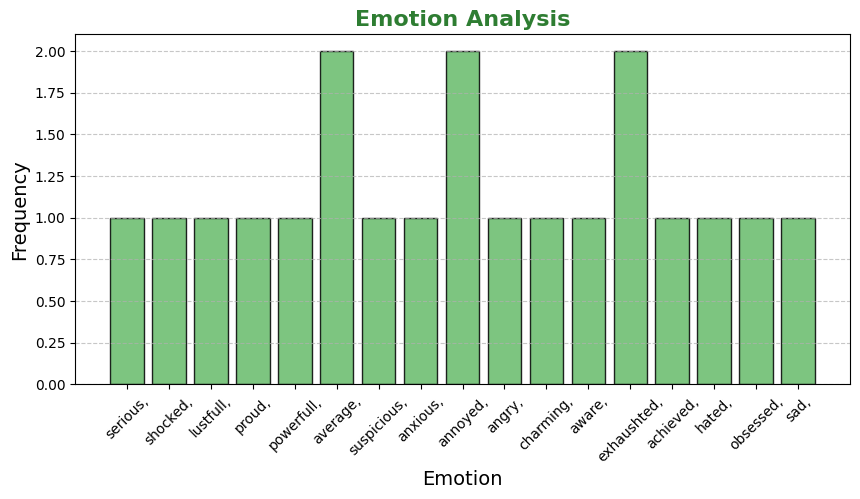

<Figure size 100x100 with 0 Axes>

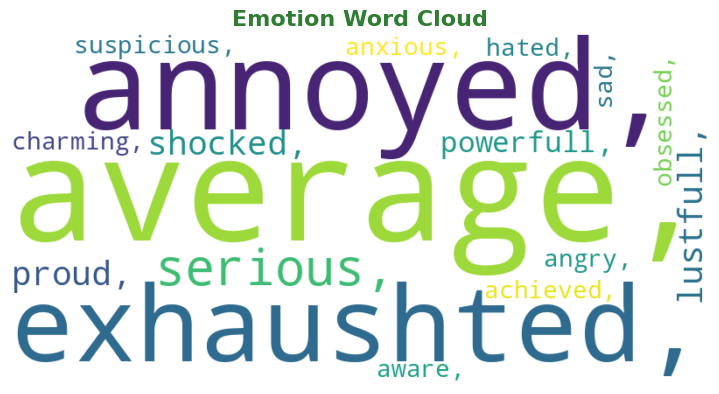

<Figure size 100x100 with 0 Axes>

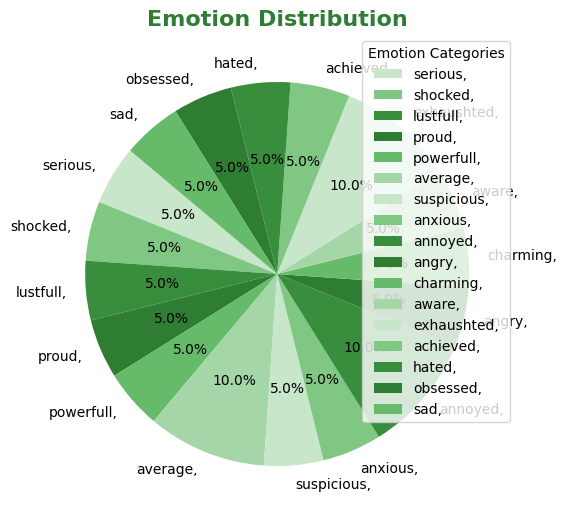

In [ ]:
# !pip install textblob==0.17.1
import nltk
from IPython.display import display, HTML
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob

# **Ensure NLTK data is downloaded correctly**
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# **Text processing**
text = open('/content/GenZ.txt', encoding='utf-8').read().lower()
cleaned_text = text.translate(str.maketrans('', '', string.punctuation))
tokenized_words = word_tokenize(cleaned_text, "english")

# **Stopword removal**
stop_words = set(stopwords.words('english'))
final_words = [word for word in tokenized_words if word not in stop_words]

# **Emotion dictionary processing**
emotion_dict = {}
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.strip()
        if ':' in clear_line:
            word, emotion = clear_line.split(':')
            word = word.replace("'", "").strip()
            emotion = emotion.replace("'", "").strip()
            emotion_dict[word] = emotion

# **Extract emotions from final words**
emotions_list = [emotion_dict[word] for word in final_words if word in emotion_dict]
emotion_count = Counter(emotions_list)

print("Emotion Frequency:", emotion_count)

# **Sentiment analysis using VADER**
score = SentimentIntensityAnalyzer().polarity_scores(cleaned_text)

print("VADER Sentiment Scores:", score)

# **Define color palettes based on sentiment type**
if score['neg'] > score['pos']:
    sentiment_result = "Negative Sentiment"
    sentiment_color = "#D32F2F"  # Dark red for negative
    bar_color = "#FF6F61"  # Light red for bar chart
    pie_colors = ['#FFCDD2', '#EF5350', '#D32F2F', '#B71C1C', '#F44336', '#E57373']  # Pastel reds
elif score['pos'] > score['neg']:
    sentiment_result = "Positive Sentiment"
    sentiment_color = "#2E7D32"  # Dark green for positive
    bar_color = "#66BB6A"  # Light green for bar chart
    pie_colors = ['#C8E6C9', '#81C784', '#388E3C', '#2E7D32', '#66BB6A', '#A5D6A7']  # Pastel greens
else:
    sentiment_result = "Neutral Sentiment"
    sentiment_color = "#FFA000"  # Orange for neutral
    bar_color = "#FFCC80"  # Light orange for bar chart
    pie_colors = ['#FFE0B2', '#FFB74D', '#FFA726', '#FB8C00', '#FF9800', '#FFCC80']  # Pastel yellows/oranges

# **AI-based Sentiment Analysis (appears first, dynamic colors)**
ai_sentiment, ai_score = analyze_sentiment_with_textblob(cleaned_text)
formatted_text = f"""
<span style='font-size:36px; font-weight:bold; color:{sentiment_color};'>{sentiment_result}</span>
<br>
<span style='font-size:30px; font-weight:bold; color:{sentiment_color};'>AI-based Sentiment (TextBlob): {ai_sentiment} (Score: {ai_score:.2f})</span>
"""
display(HTML(formatted_text))

# **Ensure emotion data exists before visualizing**
if sum(emotion_count.values()) > 0:
    plt.figure(figsize=(1, 1))  # **Blank figure for spacing**

    # **bar chart**
    plt.figure(figsize=(10, 5))
    plt.bar(emotion_count.keys(), emotion_count.values(), color=bar_color, edgecolor='black', alpha=0.85)
    plt.xlabel('Emotion', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Emotion Analysis', fontsize=16, fontweight="bold", color=sentiment_color)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.subplots_adjust(top=0.9, bottom=0.2)
    plt.show()

    plt.figure(figsize=(1, 1))  # **Blank figure for spacing**

    # **word cloud**
    plt.figure(figsize=(10, 5))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate_from_frequencies(emotion_count)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Emotion Word Cloud', fontsize=16, fontweight="bold", color=sentiment_color)
    plt.subplots_adjust(top=0.9, bottom=0.2)
    plt.show()

    plt.figure(figsize=(1, 1))  # **Blank figure for spacing**

    # **pie chart **
    plt.figure(figsize=(8, 8))
    plt.pie(emotion_count.values(), labels=emotion_count.keys(), autopct='%1.1f%%', startangle=140, colors=pie_colors)
    plt.title('Emotion Distribution', fontsize=16, fontweight="bold", color=sentiment_color)
    plt.legend(title="Emotion Categories", loc="upper right")
    plt.subplots_adjust(top=0.9, bottom=0.3)
    plt.show()
else:
    print("No emotion data available for charts.")